In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandasgui import show
import matplotlib.ticker as ticker

In [66]:
df = pd.read_pickle("../nas_pickle/test_0.98_util_0.02_hl_4_10_40.pkl")

gui = show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [56]:
def validate(df):
        # Ensure architectures with the same hash have the same parameters.
        def hash_validate(df_group):
            rows_valid = df_group.eq(df_group.iloc[0]).all(axis=1).all()
            if not rows_valid:
                raise(ValueError(f"Hash {df_group['hash'].iloc[0]} contains different architectures!"))

        df.groupby("hash").apply(hash_validate)

        # Ensure dataframe is maintaining a consistent index.
        if not df.index.is_unique:
            raise(ValueError(f"Index values are not unique!"))
        
validate(df)

ValueError: Hash cb453698dbf17daefddee94eaa2327c7 contains different architectures!

In [47]:
df = pd.read_pickle("../nas_pickle/test_0.98_util_0.02_hl_4_10_40.pkl")
df.groupby('hash').apply(validate)

Hash a02b070d1cfe6aa879ad0381f82f9e9c contains different architectures!
Hash a3c2c4306152a8e1fa8354ca64a27dc5 contains different architectures!
Hash fb9f2a84b381f87922ff328ae106ea83 contains different architectures!


""


In [9]:
def serialise_params(pd_obj):
    serial_list = pd_obj["hidden_layers"] + pd_obj["inter_layer_bitwidth"] + pd_obj["inter_layer_fanin"]
    return serial_list

# Function to calculate variance of list-like elements in a series
def convergence(df):
    vals = []
    for i in range(df['gen'].max() + 1):
        gen_df = df[df['gen'] == i]
        matrix = []
        for j in range(len(gen_df)):
            matrix.append(serialise_params(gen_df.iloc[j]))
        np_matrix = np.array(matrix)
        std_dev = np.std(np_matrix, axis=0)
        cv = (std_dev / np.mean(np_matrix, axis=0))
        vals.append(np.mean(cv))

    return vals

generation_stats = df.groupby('gen')['fitness'].agg(['min', 'mean']).reset_index()
generation_stats["convergence"] = convergence(df)

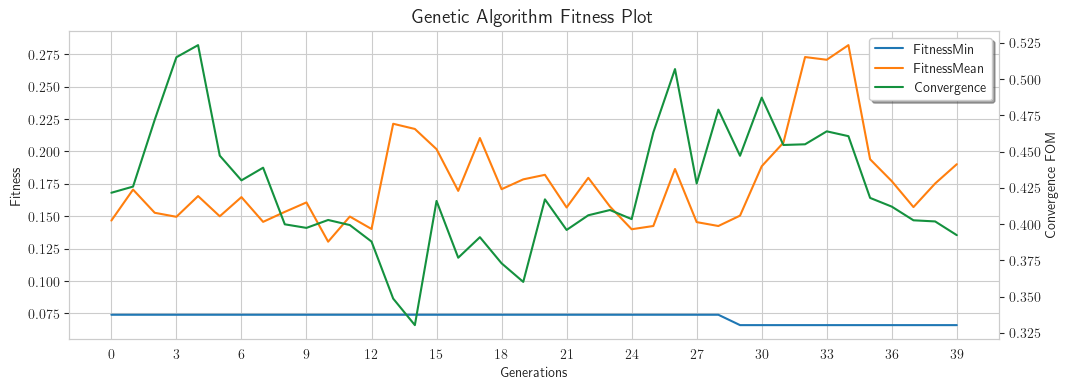

In [11]:
import os
# Replace "/path/to/latex/bin" with the actual path to your LaTeX bin directory
os.environ["PATH"] += os.pathsep + 'C:/Users/Peter/AppData/Local/Programs/MiKTeX/miktex/bin/x64'

sns.set_style('whitegrid')
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'')

fig, ax1 = plt.subplots(figsize=(12, 4))

ln1 = ax1.plot(generation_stats[['min', 'mean']], label=['FitnessMin', 'FitnessMean'])
ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness")
ax1.set_title("Genetic Algorithm Fitness Plot", fontsize=14)
ax2 = plt.twinx(ax1)
ln2 = ax2.plot(generation_stats['convergence'], color="#14913E", label="Convergence")
ax2.tick_params(axis='y')
ax2.set_ylabel("Convergence FOM")

ax1.yaxis.set_major_locator(ticker.MaxNLocator(10))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(16))
ax2.grid(None)

# Create a single, shared legend
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper right', fancybox=True, shadow=True, ncol=1)

# latex_table = r"""
# \begin{tabular}{ll}
# \hline
# \textbf{Parameter} & \textbf{Value} \\
# \hline
# Alpha & 0.5 \\
# Beta & 0.3 \\
# Gamma & 0.2 \\
# \hline
# \end{tabular}
# """

# # Display the LaTeX table in the figure
# plt.text(1.1, 0.5, latex_table)

#transform=ax1.transAxes

# parameters = [['Learning rate', '0.01'], 
#               ['Epochs', '100'], 
#               ['Batch size', '32'],
#               ['Optimizer', 'Adam']]

# # Add a table at the right of the axes
# table = plt.table(cellText=parameters,
#                   colLabels=['Parameter', 'Value'], 
#                   cellLoc = 'center', 
#                   loc='center right',
#                   bbox=[1.1, 0, 0.3, 1])  # [left, bottom, width, height]

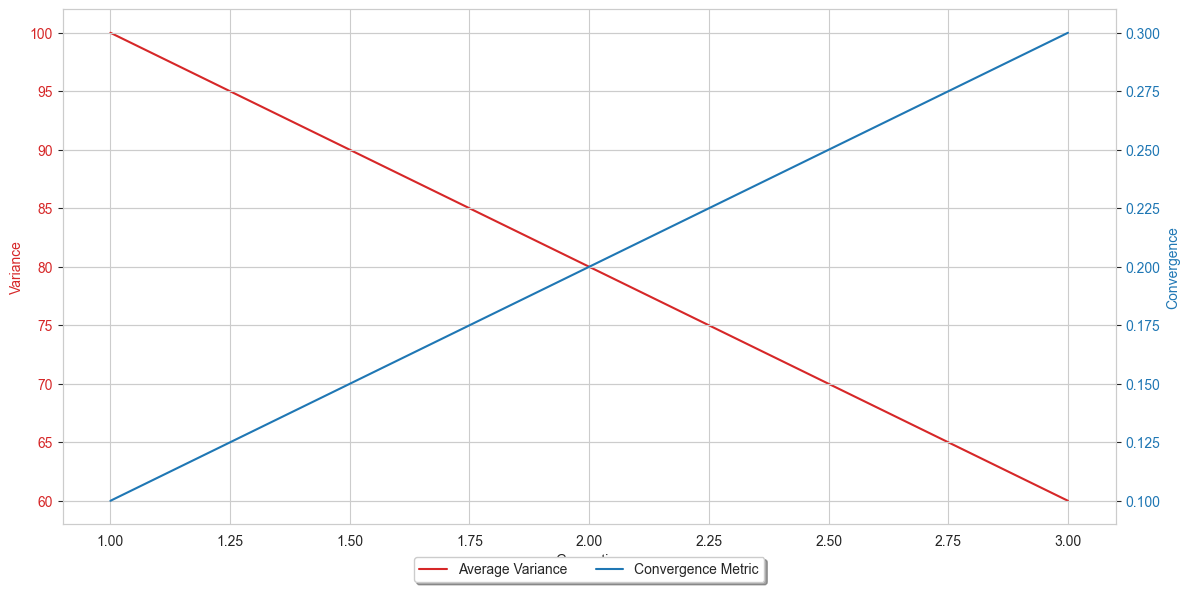

In [130]:
genetic_code_variance = pd.DataFrame({'gen': [1, 2, 3], 'average_variance': [100, 80, 60]})
convergence_data = pd.DataFrame({'Generation': [1, 2, 3], 'Convergence Metric': [0.1, 0.2, 0.3]})

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset on ax1
color = 'tab:red'
ax1.set_xlabel('Generation')
ax1.set_ylabel('Variance', color=color)
ln1 = ax1.plot(genetic_code_variance['gen'], genetic_code_variance['average_variance'], color=color, label='Average Variance')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the convergence data
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Convergence', color=color)
ln2 = ax2.plot(convergence_data['Generation'], convergence_data['Convergence Metric'], color=color, label='Convergence Metric')
ax2.tick_params(axis='y', labelcolor=color)

# Combine handles and labels for the legend
lns = ln1 + ln2
labels = [l.get_label() for l in lns]

# Create a single, shared legend
ax1.legend(lns, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

fig.tight_layout()
plt.show()

In [92]:
gen_df = df.groupby('gen')
gen_df

In [78]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [2, 2, 2]})

df[["A", "B"]]

,A,B
0,1,4
1,2,5
2,3,6


In [57]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# New row to add as a dictionary
new_row = {'A': 4, 'B': 7}

# Convert the dictionary to a DataFrame and concatenate
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
df.head()

,A,B
0,1,4
1,2,5
2,3,6
3,4,7
